In [44]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

from collections import OrderedDict

import pandas as pd
import seaborn as sns
import numpy as np
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


# Classification Setup & Feature Engineering!

The first goal of this notebook is to first show how we can take a bunch of raw, relational data and manipulate it into the format of a machine learning problem (binary classification). This is the sort of thing we'll often be given in a business setting - information that's been collected with no clear guidance about how we can frame this information as a predictive task in the $X$ features, $y$ target style.

The second goal of this notebook is to expose you to feature engineering ideas and best practices. Knowing how to select models and tune hyperparameters is very important, but models can only be as good as the quality of the features that you provide to them. In practical machine learning, a huge amount of time is spent engineering and selecting features to add signal to the problem, and **you can often get a lot more additional value from well-constructed features than from hyperparameter fine tuning**. Hence it's very important to be able to apply domain knowledge, think extensively about what features should matter, and derive them to include in your model.    

### Workflow: 

1. **Problem setup and baselining**
2. **Feature engineering to improve our model**
3. **Feature engineering exercises and future ideas**

## 1. Problem setup and baselining

In [29]:
X = pd.read_pickle('/Users/ridwan/Documents/DataScience/Metis/Metis_Projects/Data/flights/df_X.pickle')
y = pd.read_pickle('/Users/ridwan/Documents/DataScience/Metis/Metis_Projects/Data/flights/df_y.pickle')

### Turning to EDA and Baselining

In particular, as we build features we'll want to **look for visual evidence that the data is separable using these features**. Since we'll be using logistic regression for baselining, we ideally want to find indications of linear separability.  

We should immediately check out the distribution of our labels and know that we're working with an **imbalanced classification task** (always check this first!). This is analagous to the first step of checking the continuous target distribution in a regression problem. We'll definitely want to account for the imbalance later (though not in this notebook) when we try to optimize our F1 score, the chosen metric for scoring our model.

0    0.588883
1    0.411117
Name: DELAY, dtype: float64


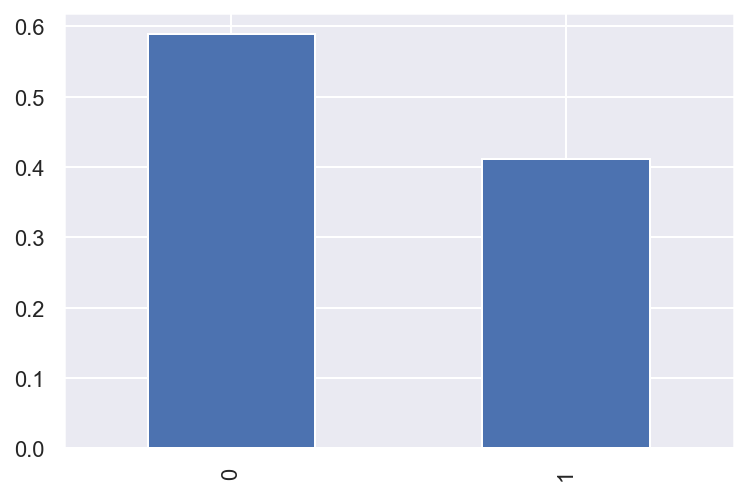

In [30]:
target_pcts = y.value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

Now that we have a feel for our target, we'll start looking for feature-target relationships. Since we'll do this repeatedly on a sample of the data as we build out features, let's write another utility function that generates a seaborn pairplot matrix colored by the target value.  

In [54]:
df_X = X.join(y, how='outer')

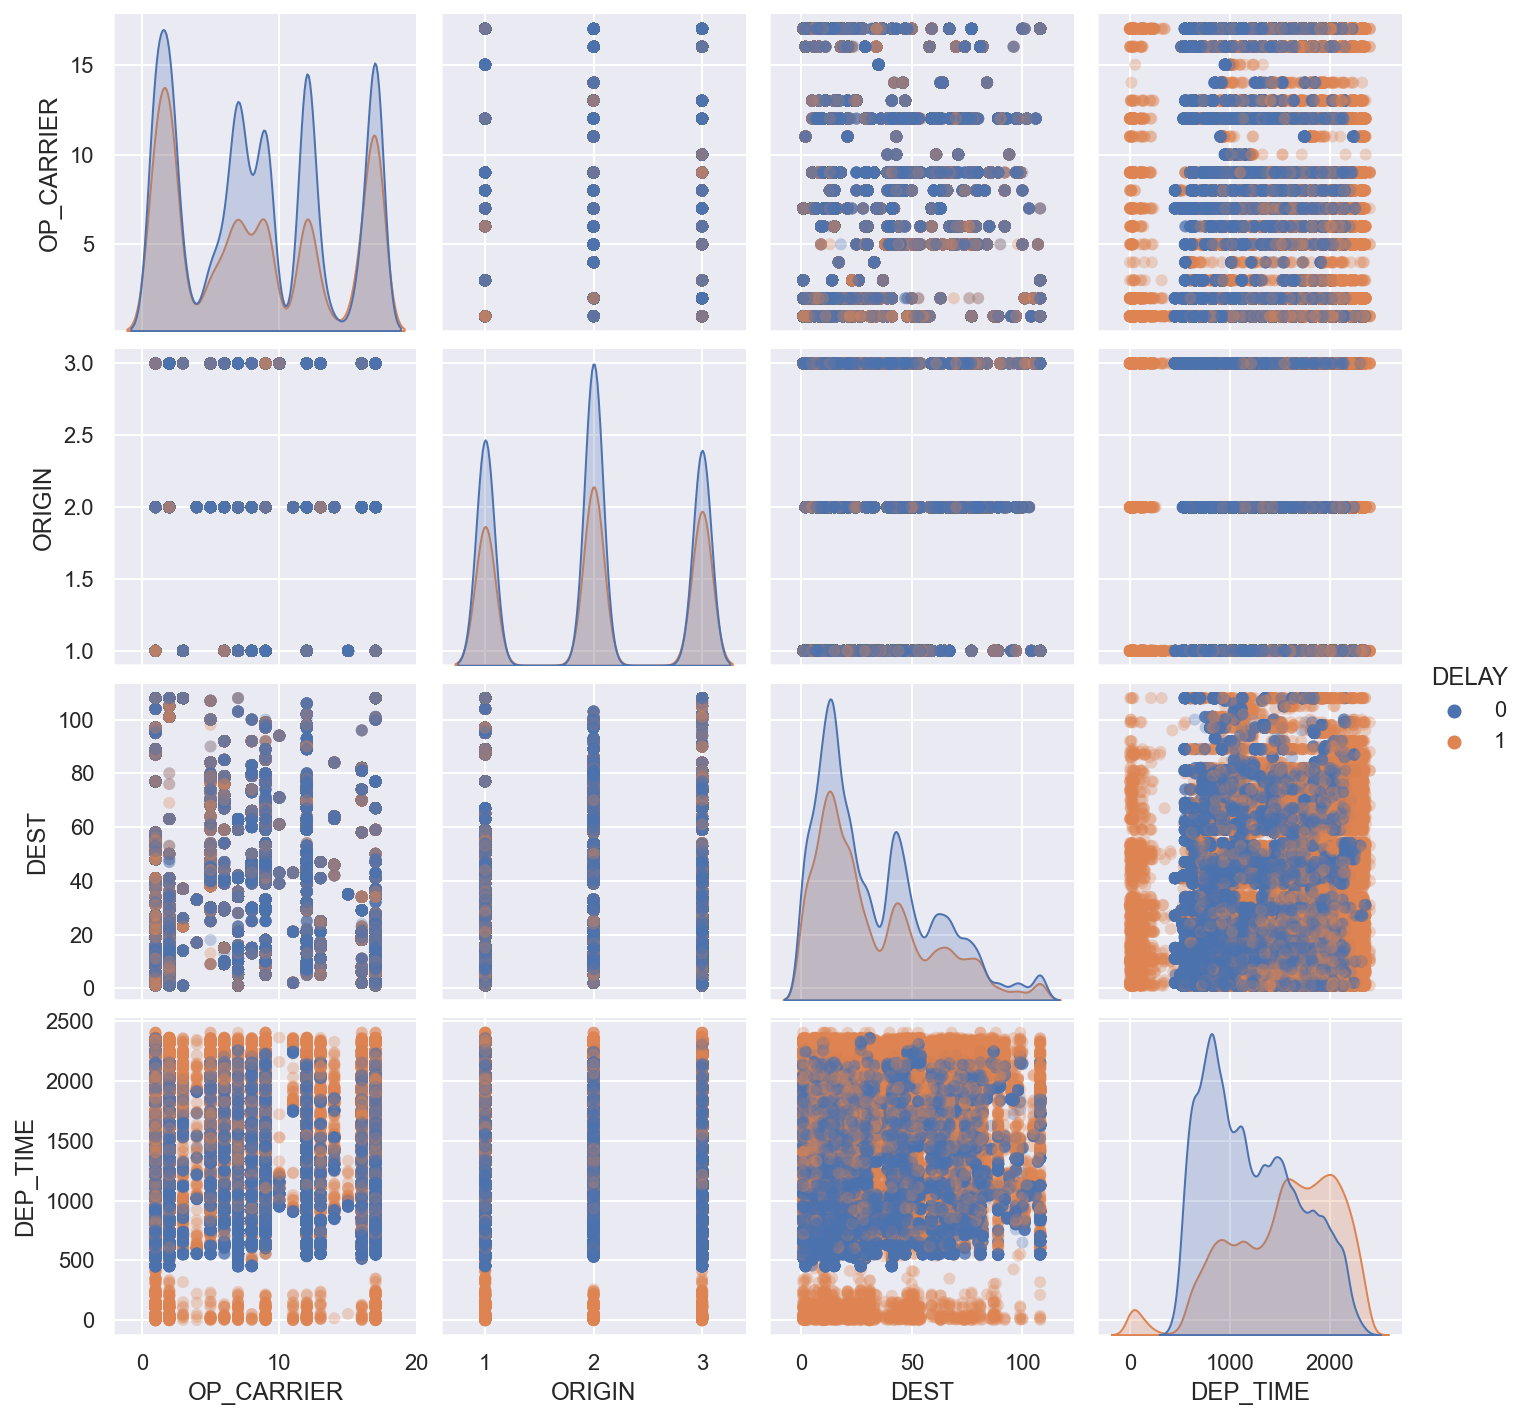

In [68]:
def plot_features(df, sample_size=500):
    
    sample = (df.sample(1000, random_state=44)) 
    sns.pairplot(df,hue='DELAY', plot_kws=dict(alpha=.3, edgecolor='none'))

plot_features(df_X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#hold out 20% of the data for final testing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state = 42)

In [59]:
#when using scaled solution, takes a long time 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [60]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train_scaled, y_train)
f1_score(lr.predict(X_test_scaled), y_test)

0.5331363986642692

In [61]:
# Scoring and predicting on validation set
lr.score(X_val_scaled, y_val)
y_preds = lr.predict(X_val_scaled)
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73     12644
           1       0.61      0.48      0.54      8743

    accuracy                           0.66     21387
   macro avg       0.65      0.63      0.64     21387
weighted avg       0.66      0.66      0.65     21387



In [62]:
lr.coef_

array([[-0.00123913,  0.0767451 , -0.06733005,  0.66211214]])

## 2. Feature engineering to improve our model

The first thing we need to do is think critically about the predictive task and the types of features that we need to use. We should draw heavily on domain knowledge and be open to trial and error. 

### Feature Types:

Example: 

* **Product** features: general information about product purchase patterns across ALL users. The category of the product, its general popularity, how high priority the item tends to be, etc.
* **User** features: information about specific user behavior. How many items do they tend to order, how long has it been since they've last ordered, what time of day do they usually order, etc. 
* **User-Product** features: information about product-specific user behavior. How often have they ordered this product, how high-priority does it tend to be for them, how long has it been since they've ordered this product, etc.

When engineering 10s or hundreds of features, it can quickly become tricky to keep track of all our code and feature outputs. Here are a couple of best practices:

  1. Use consistent naming conventions for features of the same type 
  2. Build features at the same level of aggregation at the same time, and track them in a dedicated dataframe. Merge back into the ML-formatted dataframe at the end of the process.
  
With this in mind, we'll start with product level features.

Each time we expand our feature set, lets generate a new set of visuals to study the feature-target relationships and look for separability.   

We've come a long way, but have a ways yet to go. We should be able to improve our F1 with a combination of:

    1. More/better features
    2. More training data (we have lots more available)
    3. Better handling of the class imbalance issue / decision threshold (topic for future lecture)
    4. More sophisticated models

## 3. Feature engineering exercises and future ideas

In [ ]:
# Add product category / aisle information as categorical features 

In [ ]:
# Add another user-product feature that computes how many orders it's been since the user ordered that product 


In [ ]:
# Add another user-product feature that computes the % of times a product shows up consecutively in the user's orders
# (i.e. they reordered it immediately in the next order)


In [ ]:
# We haven't used the data on order time / day of week at all yet. We could use this to measure the typical times 
# products tend to be ordered (both generically and at the user-product level), and quantify the difference
# between the time of the latest order and these typical times to pick up new signal around ordering patterns.

# Modify the product and user-product features to compute average hour of day and day of week. Add these to df_X,
# Then add features of the form user_product_avg_hod_delta that take the dif of the current order time and the avg. 


In [ ]:
# So far the way we've used the order history treats the entire history on equal terms - for example, user-product 
# order frequency treats orders from months ago the same as recent ones. Come up with features that focus more
# on the most recent orders or give them more weight than older ones.